In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [38]:
df = pd.read_csv("feature_engineered.csv", parse_dates=["settlement_date"])
df = df.set_index("settlement_date")
df = df.asfreq("30min")
df = df.dropna()

In [39]:
feature_cols = [
    "hour",
    "dayofweek",
    "month",
    "is_weekend",
    "lag_1",
    "lag_24",
    "lag_48",
    "lag_168",
    "rolling_24h_mean",
    "rolling_24h_std",
    "rolling_7d_mean"
]
target_col = "nd"

train = df.loc["2009":"2021"]
val = df.loc["2022":"2023"]
test = df.loc["2024"]

X_train = train[feature_cols]
y_train = train[target_col]

X_val = val[feature_cols]
y_val = val[target_col]

X_test = test[feature_cols]
y_test = test[target_col]

In [40]:
print(X_train.shape, X_val.shape, X_test.shape)

(220726, 11) (34364, 11) (15982, 11)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1, #Essentially saying use all CPU threads
    random_state=42 #Hitchhikers Guide!
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_val_prediction = rf.predict(X_val)
y_test_prediction = rf.predict(X_test)

mae_val = mean_absolute_error(y_val, y_val_prediction)
rmse_val = root_mean_squared_error(y_val, y_val_prediction)

y_test_mae = mean_absolute_error(y_test, y_test_prediction)
y_test_rsme = root_mean_squared_error(y_test, y_test_prediction)


print(f"Validation MAE:", mae_val, "Unit (MW)")
print(f"Validation RMSE:", rmse_val, "Unit (MW)")
print("y_test MAE:", y_test_mae, "MW")
print("y_test RMSE:", y_test_rsme, "MW")


val_results = pd.DataFrame({
    "actual": y_val,
    "predicted": y_val_prediction,
})
print(val_results.head())

test_results = pd.DataFrame({
    "actual": y_test,
    "predicted": y_test_prediction,
})
print(test_results.head())

Validation MAE: 275.8469730919955 Unit (MW)
Validation RMSE: 374.1272976991676 Unit (MW)
y_test MAE: 293.47534100863476 MW
y_test RMSE: 394.03250742556395 MW
                      actual     predicted
settlement_date                           
2022-01-01 00:00:00  21940.0  21515.720000
2022-01-01 00:30:00  22427.0  21067.176667
2022-01-01 01:00:00  21896.0  22040.030000
2022-01-01 01:30:00  20693.0  21590.296667
2022-01-01 02:00:00  19481.0  20338.786667
                      actual     predicted
settlement_date                           
2024-01-01 00:00:00  21783.0  21304.436667
2024-01-01 00:30:00  22521.0  20975.153333
2024-01-01 01:00:00  22194.0  22491.413333
2024-01-01 01:30:00  21510.0  21876.523333
2024-01-01 02:00:00  20619.0  21234.426667


In [43]:
def figure_design():
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis="both",direction="in", top=True, right=True)

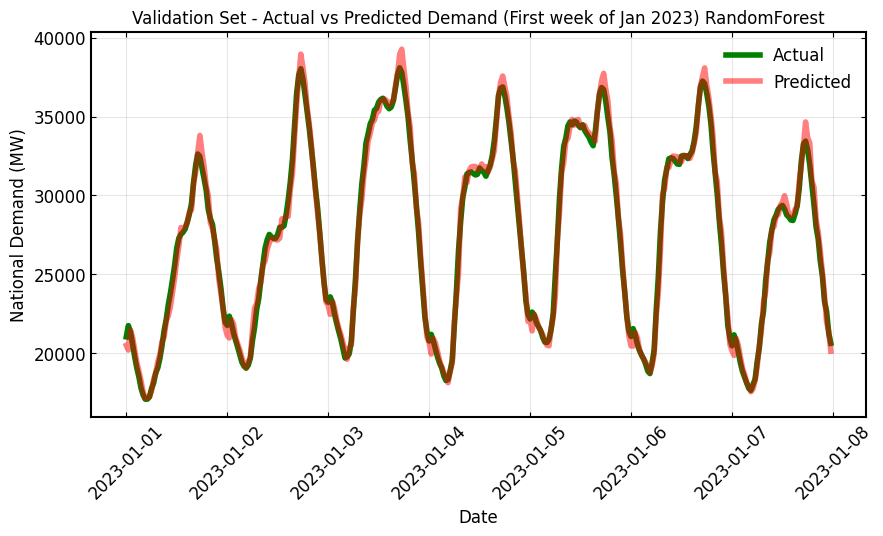

In [44]:
week_slice = val_results.loc["2023-01-01":"2023-01-07"]

plt.figure(figsize=(10, 5))
plt.plot(week_slice.index, week_slice["actual"], label="Actual", linewidth=4, color="green")
plt.plot(week_slice.index, week_slice["predicted"], label="Predicted", linewidth=4, color="red", alpha=0.5)
figure_design()
plt.title("Validation Set - Actual vs Predicted Demand (First week of Jan 2023) RandomForest")
plt.xlabel("Date", fontsize=12)
plt.ylabel("National Demand (MW)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=45)
plt.show()

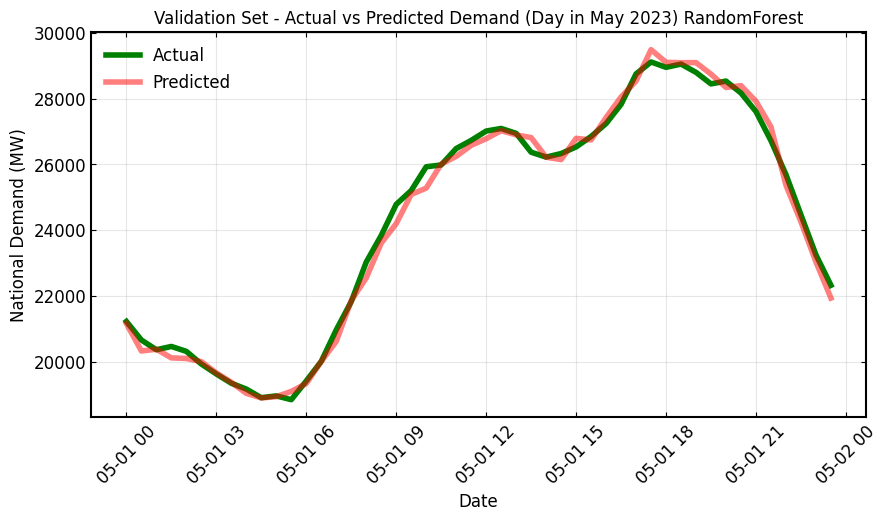

In [45]:
day_slice = val_results.loc["2022-05-01":"2022-05-01"]

plt.figure(figsize=(10, 5))
plt.plot(day_slice.index, day_slice["actual"], label="Actual", linewidth=4, color="green")
plt.plot(day_slice.index, day_slice["predicted"], label="Predicted", linewidth=4, color="red", alpha=0.5)
figure_design()
plt.title("Validation Set - Actual vs Predicted Demand (Day in May 2023) RandomForest")
plt.xlabel("Date", fontsize=12)
plt.ylabel("National Demand (MW)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=45)
plt.show()

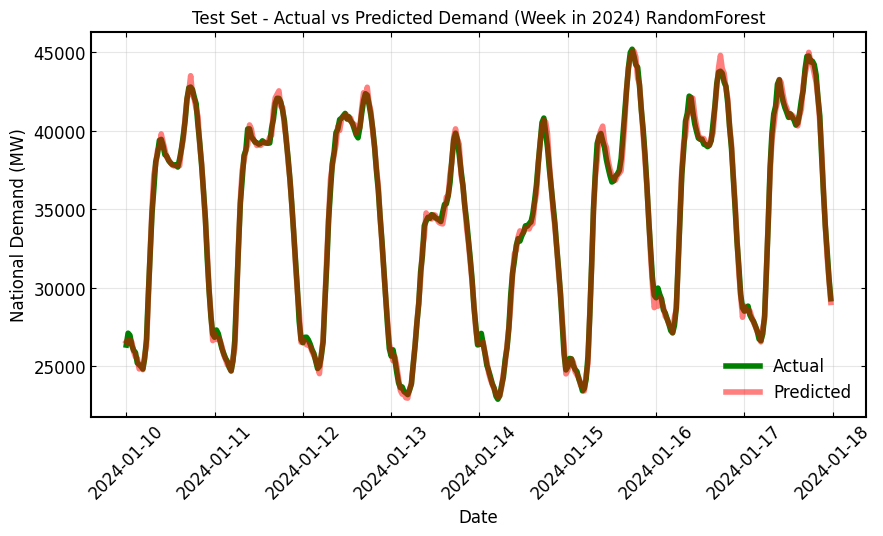

In [46]:
week_2024 = test_results.loc["2024-01-10":"2024-01-17"]

plt.figure(figsize=(10, 5))
plt.plot(week_2024.index, week_2024["actual"], label="Actual", linewidth=4, color="green")
plt.plot(week_2024.index, week_2024["predicted"], label="Predicted", linewidth=4, color="red", alpha=0.5)
figure_design()
plt.title("Test Set - Actual vs Predicted Demand (Week in 2024) RandomForest")
plt.xlabel("Date", fontsize=12)
plt.ylabel("National Demand (MW)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=45)
plt.show()

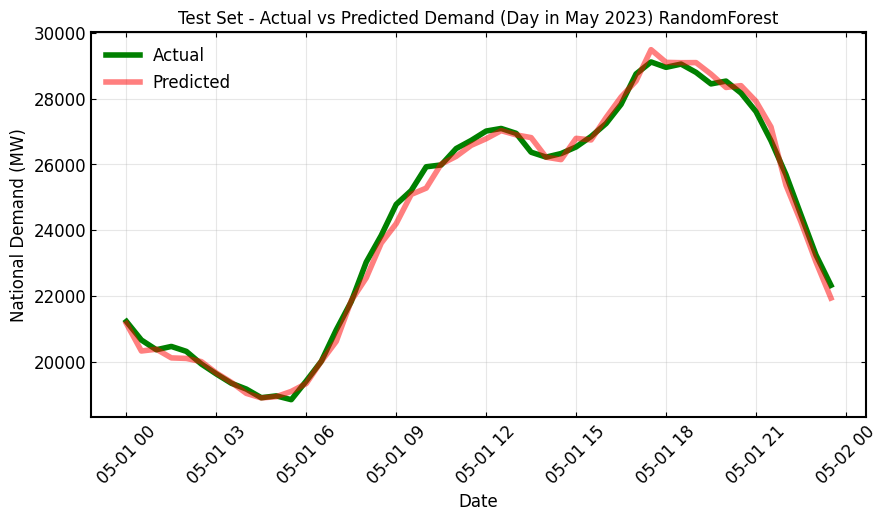

In [47]:
day_slice_test = test_results.loc["2024-05-01":"2024-05-01"]

plt.figure(figsize=(10, 5))
plt.plot(day_slice.index, day_slice["actual"], label="Actual", linewidth=4, color="green")
plt.plot(day_slice.index, day_slice["predicted"], label="Predicted", linewidth=4, color="red", alpha=0.5)
figure_design()
plt.title("Test Set - Actual vs Predicted Demand (Day in May 2023) RandomForest")
plt.xlabel("Date", fontsize=12)
plt.ylabel("National Demand (MW)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=45)
plt.show()

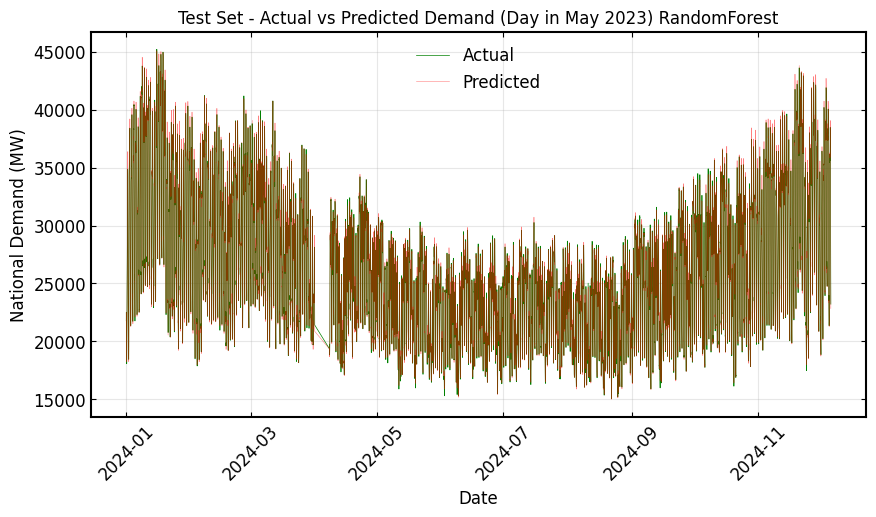

In [48]:
year_slice_test = test_results.loc["2024-01-01":"2024-12-31"]

plt.figure(figsize=(10, 5))
plt.plot(year_slice_test.index, year_slice_test["actual"], label="Actual", linewidth=.5, color="green")
plt.plot(year_slice_test.index, year_slice_test["predicted"], label="Predicted", linewidth=0.4, color="red", alpha=0.5)
figure_design()
plt.title("Test Set - Actual vs Predicted Demand (Day in May 2023) RandomForest")
plt.xlabel("Date", fontsize=12)
plt.ylabel("National Demand (MW)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [49]:
importance = rf.feature_importances_
feature_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print(feature_importance)

             feature  importance
4              lag_1    0.980481
0               hour    0.013599
5             lag_24    0.001375
7            lag_168    0.001202
10   rolling_7d_mean    0.000747
2              month    0.000648
8   rolling_24h_mean    0.000646
6             lag_48    0.000412
1          dayofweek    0.000362
9    rolling_24h_std    0.000318
3         is_weekend    0.000209


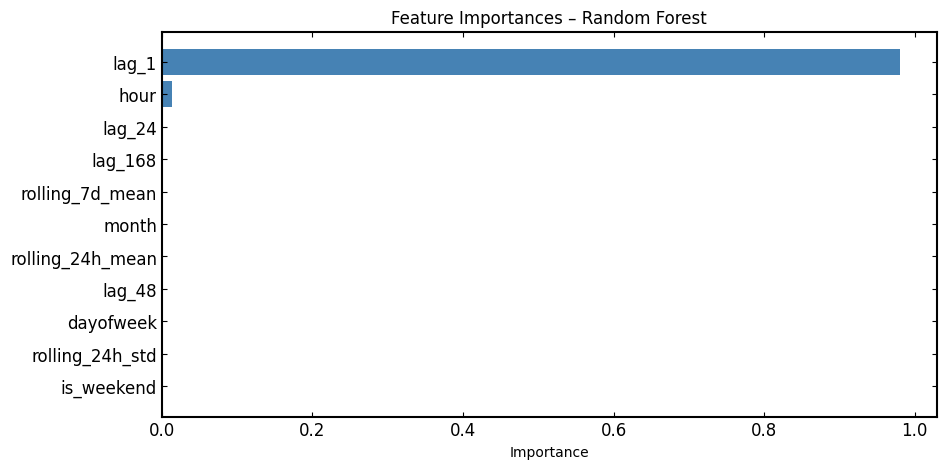

In [50]:
plt.figure(figsize=(10,5))
plt.barh(feature_importance["feature"], feature_importance["importance"], color="steelblue")
plt.xlabel("Importance")
plt.title("Feature Importances – Random Forest")
plt.gca().invert_yaxis()
figure_design()
plt.show()

This was not unexpected but the degree of importance explains the over/under-estimation at peaks and troughs. For a simple model this works fine. However, I would like to capture those peaks and troughs. This could maybe be achieved using a gradient boosting model. This should take more information from other features and not rely solely on the past 30mins.